In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Lambda(lambda x: (x+1)/2)]) # custom normalization

# Load the training dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                           train=True,
                                           download=True,
                                           transform=transform)

# Load the testing dataset
val_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train=False,
                                          download=True,
                                          transform=transform)



100%|██████████| 26.4M/26.4M [00:01<00:00, 18.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 299kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.46MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.48MB/s]


In [ ]:
# Define the split ratio (e.g., 80% train, 20% validation)
train_ratio = 0.8
val_ratio = 1 - train_ratio

# Calculate the sizes of the splits
dataset_size = len(train_dataset)
train_size = int(train_ratio * dataset_size)
val_size = dataset_size - train_size

# Split the dataset
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Print the sizes of the splits
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

Training set size: 48000
Validation set size: 12000


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7 * 7 * 64, 128)  # Adjust input size for fc1
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Removed batch normalization
        x = self.pool(F.relu(self.conv2(x)))  # Removed batch normalization
        x = x.view(-1, 7 * 7 * 64)  # Adjust flattening for new dimensions
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = CNN()

In [ ]:
class CNN(nn.Module): #2 pooling
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # First pooling layer
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Second pooling layer
        self.fc1 = nn.Linear(3 * 3 * 64, 128)  # Adjust input size for fc1
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))  # Apply first pooling
        x = self.pool2(F.relu(self.conv2(x)))  # Apply second pooling
        x = x.view(-1, 3 * 3 * 64)  # Adjust flattening for new dimensions
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch [1/10], Train Loss: 0.1908, Validation Loss: 0.2584
Epoch [2/10], Train Loss: 0.1779, Validation Loss: 0.2574
Epoch [3/10], Train Loss: 0.1681, Validation Loss: 0.2621
Epoch [4/10], Train Loss: 0.1571, Validation Loss: 0.2721
Epoch [5/10], Train Loss: 0.1487, Validation Loss: 0.2390
Epoch [6/10], Train Loss: 0.1377, Validation Loss: 0.2504
Epoch [7/10], Train Loss: 0.1297, Validation Loss: 0.2531
Epoch [8/10], Train Loss: 0.1196, Validation Loss: 0.2755
Epoch [9/10], Train Loss: 0.1105, Validation Loss: 0.2619
Epoch [10/10], Train Loss: 0.1042, Validation Loss: 0.2822


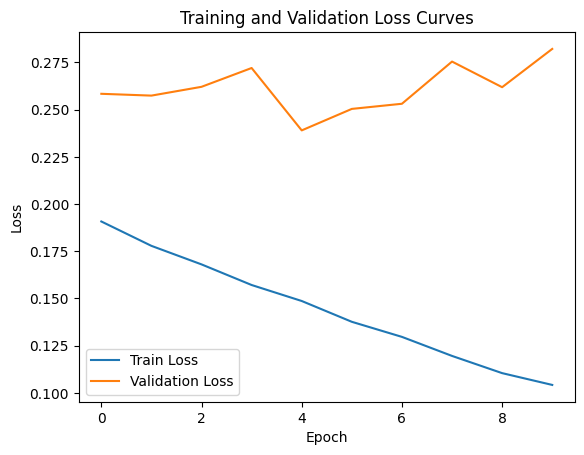

Test Accuracy: 91.51%
Confusion Matrix:
[[1063    0   15   20    8    1   92    0    2    0]
 [   3 1184    0   13    0    0    0    0    0    0]
 [  17    1 1062    2   81    0   63    0    2    0]
 [  55    9    7 1019   45    0   18    0    2    0]
 [   2    1   48   19 1052    0   32    0    1    0]
 [   0    0    0    1    0 1226    0    8    6    5]
 [ 140    2   53   27   99    0  891    0    5    0]
 [   0    0    0    0    0   13    0 1117    5   50]
 [   5    0    4    2    1    2    4    0 1194    0]
 [   0    1    0    0    0   11    0   15    1 1173]]


In [ ]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 10

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # Using validation set as test set for now

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Plot loss curves
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Curves")
plt.show()

# Evaluation
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

In [ ]:
import torch.nn as nn
import torch.optim as optim

class BaselineMLP(nn.Module):
    def __init__(self):
        super(BaselineMLP, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Add a pooling layer
        self.fc1 = nn.Linear(32 * 14 * 14, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply convolution and ReLU
        x = self.pool(x)  # Apply pooling
        x = x.view(-1, 32 * 14 * 14)  # Flatten the output
        x = self.fc1(x)  # Output layer
        return x

# Create an instance of the baseline model
baseline_model = BaselineMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)

# Training loop (similar to your existing code)
# ... (You can reuse your training loop with the baseline_model)

Epoch [1/10], Train Loss: 0.6038, Validation Loss: 0.4272
Epoch [2/10], Train Loss: 0.4056, Validation Loss: 0.3799
Epoch [3/10], Train Loss: 0.3714, Validation Loss: 0.3737
Epoch [4/10], Train Loss: 0.3458, Validation Loss: 0.3359
Epoch [5/10], Train Loss: 0.3286, Validation Loss: 0.3385
Epoch [6/10], Train Loss: 0.3131, Validation Loss: 0.3145
Epoch [7/10], Train Loss: 0.3006, Validation Loss: 0.3120
Epoch [8/10], Train Loss: 0.2891, Validation Loss: 0.3103
Epoch [9/10], Train Loss: 0.2765, Validation Loss: 0.3010
Epoch [10/10], Train Loss: 0.2671, Validation Loss: 0.2980


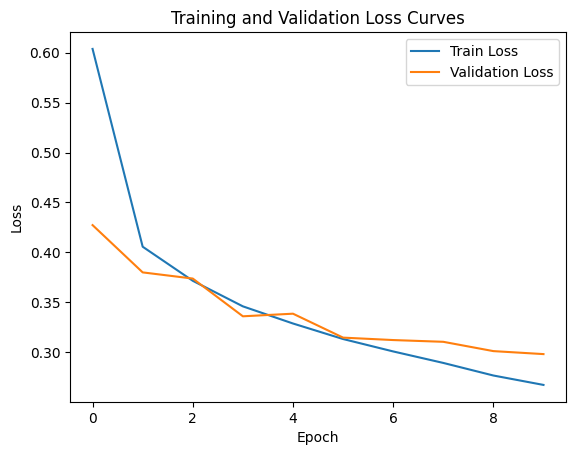

Test Accuracy: 89.73%
Confusion Matrix:
[[1070    2   32   23    9    1   58    0    6    0]
 [   1 1178    1   17    2    0    1    0    0    0]
 [  17    1 1100    4   71    0   32    0    3    0]
 [  32    9    9 1045   33    0   22    0    5    0]
 [   3    1   96   31  994    0   24    0    6    0]
 [   0    0    0    0    0 1221    0   14    3    8]
 [ 192    4  146   33  134    0  696    0   12    0]
 [   0    0    0    0    0   20    0 1134    2   29]
 [   2    1    5    3    2    3    9    2 1183    2]
 [   0    1    0    0    0   20    0   32    1 1147]]


In [ ]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 10

# Create data loaders (assuming you have train_dataset and val_dataset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # Using validation set as test set for now

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training
    baseline_model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = baseline_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    baseline_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = baseline_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Plot loss curves (similar to your existing code)
# ...

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Curves")
plt.show()

# Evaluation
baseline_model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = baseline_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)